In [15]:
import ROOT

In [16]:
from pyjano.jana import Jana
jana = Jana()

In [17]:
jana.plugins_gui()

HTML(value='\n\n\n    <input type="hidden" class=".plugin_data_input" value="">\n    <div class="row">\n      …

<IPython.core.display.Javascript object>

In [18]:
input_dir = '../genxyz/generated/'
input_name = '10_100' # Beam energies: 5_41, 5_100, 10_100, 18_275 

Create ROOT TTrees from with smearing of all detectors

In [13]:
# loop over detectors and make smeard files
detectors = ['jleic', 'beast', 'ephenix']

for detector_name in detectors:
    Jana().plugin('lund_reader')\
          .plugin('event_writer')\
          .plugin('eic_smear', detector=detector_name)\
          .plugin('jana', nevents=50000, output='outTree/zc_sm%s_%s.root' % (detector_name,input_name))\
          .source('%s/input_%s.txt' % (input_dir,input_name))\
          .run()

To compare smeared data with not smeared, lets create also not smeared data set

In [19]:
Jana().plugin('lund_reader')\
      .plugin('event_writer')\
      .plugin('jana', nevents=50000, output='outTree/zc_nosm_%s.root' % (input_name))\
      .source('%s/input_%s.txt' % (input_dir,input_name))\
      .run()

In [ ]:
# Open root file
file = ROOT.TFile('zc_smjleic.root')

In [11]:
# Preparing histograms
xy_hist = ROOT.TH2D('xy_hist', 'Neutrons angle distribution', 60, -0.15, 0.15, 60, -0.15, 0.15)
x_hist = ROOT.TH1D('x_hist', 'Neutrons horizontal angle distribution', 60, -0.15, 0.15)
y_hist = ROOT.TH1D('y_hist', 'Neutrons vertical angle distribution', 60, -0.15, 0.15)
e_hist = ROOT.TH1D('pt_hist', 'Neutrons Pt distribution; [GeV]', 140, 0, 4)

#protons_only = ROOT.TCut('pdg==2112') # neutron
#protons_only = ROOT.TCut('pdg==211')  # pi+
#protons_only = ROOT.TCut('pdg==11')   # e-
protons_only = ROOT.TCut('pdg==-11')  # e+

In [15]:
# Reading a tree from the file
tree = file.Get('events').Get('tree')

# Filling the histograms from the tree
canvas = ROOT.TCanvas('canvas', 'canvas',600,400)
tree.Draw('asin(py/p):atan(px/pz) >> xy_hist', protons_only)
tree.Draw('atan(px/pz) >> x_hist', protons_only)
tree.Draw('asin(py/p) >> y_hist', protons_only)
tree.Draw('sqrt(px*px+py*py) >> pt_hist', protons_only)

9333

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


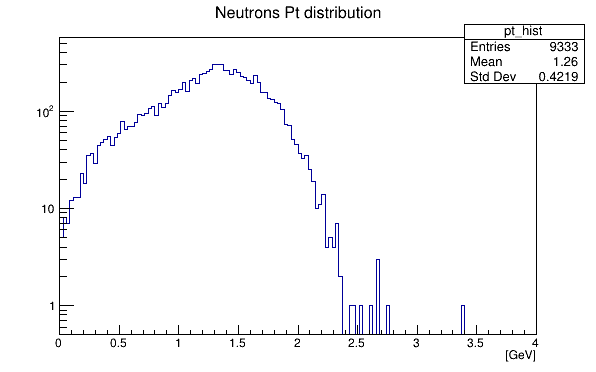

In [16]:
pad = canvas.cd()
pad.SetLogy(True)
e_hist.Draw()
canvas.Draw()

In [20]:
# Code below not working for PYTHIA, wrong formatted input...
input_dir = '../PYTHIA_6.5/PHP/'
input_name = 'pythia_e-p_10x100_Q0_100k_msel2_PHP'


In [ ]:
Jana().plugin('lund_reader')\
      .plugin('event_writer')\
      .plugin('eic_smear', detector="jleic")\
      .plugin('jana', nevents=10000, output='outTree/pythia_smjleic.root')\
      .source('%s/%s.txt' % (input_dir,input_name))\
      .run()

In [22]:
Jana().plugin('lund_reader')\
      .plugin('event_writer')\
      .plugin('jana', nevents=10000, output='outTree/pythia_nosm.root')\
      .source('%s/%s.txt' % (input_dir,input_name))\
      .run()

KeyboardInterrupt: 